In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import ngram
#import re
#import string
import nltk
from nltk.util import ngrams
#nltk.download('stopwords')

#from nltk.corpus import stopwords
#from nltk.tokenize import word_tokenize, WhitespaceTokenizer, TweetTokenizer
#from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
from collections import Counter
#from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#stop_words = set(stopwords.words('english'))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Lectura de datos - Tweets EN_US

In [4]:
dataset=pd.read_csv("en_US.twitter.txt", delimiter="\t", header=None)
dataset.columns = ['tweets']

# Limpieza de datos

## Minúsculas

In [5]:
dataset['tweets'] = dataset['tweets'].str.lower()

In [6]:
dataset[:50]

,tweets
0,how are you? btw thanks for the rt. you gonna ...
1,when you meet someone special... you'll know. ...
2,they've decided its more fun if i don't.
3,so tired d; played lazer tag & ran a lot d; ug...
4,words from a complete stranger! made my birthd...
5,first cubs game ever! wrigley field is gorgeou...
6,i no! i get another day off from skool due to ...
7,i'm coo... jus at work hella tired r u ever in...
8,the new sundrop commercial ...hehe love at fir...
9,we need to reconnect this week


## Quitar emojis, caracteres especiales y url's

In [7]:
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

def RemoveWithRegex(regex, words):
    x = np.copy(words)
    punctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
    for i in range(len(x)):
        x[i] = re.sub(regex, '', x[i])
    
        x[i] = ' '.join(word.strip(string.punctuation) for word in x[i].split())
    
    return x

In [8]:
dataset_np = dataset.to_numpy()
dataset_np = dataset_np.flatten()

In [9]:
for i in range(len(dataset_np)):
    dataset_np[i] = deEmojify(dataset_np[i])
    
regex = '( ?\: ?\)| ?xd| ?\:d| ?\<3| ?\;\)| ?\( ?\:|\.\.\.|♥| ?\: ?\(| ?\) ?\:| ?rt ?\:|([@#][\w_-]+ ?)|https?:\/\/(www\.)?[-a-zA-Z0–9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0–9@:%_\+.~#?&//=]*)|(www\.)?[-a-zA-Z0–9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0–9@:%_\+.~#?&//=]*))|([0-9])'
dataset_np = RemoveWithRegex(regex, dataset_np)

## Quitar stop words

In [10]:
for i in range(len(dataset_np)):
    word_tokens = word_tokenize(dataset_np[i]) 
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    dataset_np[i] = ' '.join(filtered_sentence)

In [11]:
dataset_np[:10]

array(['btw thanks rt gon na dc anytime soon love see way way long',
       "meet someone special 'll know heart beat rapidly 'll smile reason",
       "'ve decided fun n't",
       'tired played lazer tag ran lot ughh going sleep like minutes',
       'words complete stranger made birthday even better',
       'first cubs game ever wrigley field gorgeous perfect go cubs go',
       'get another day skool due wonderful snow wakes updamn thing',
       "'m coo jus work hella tired r u ever cali",
       'new sundrop commercial hehe love first sight',
       'need reconnect week'], dtype=object)

In [16]:
np.save('dataset.npy', dataset_np)

In [2]:
dataset_l = np.load('dataset.npy', allow_pickle=True)

# Frecuencia de palabras

In [24]:
words = ' '.join(dataset_l).split(' ')

MemoryError: 

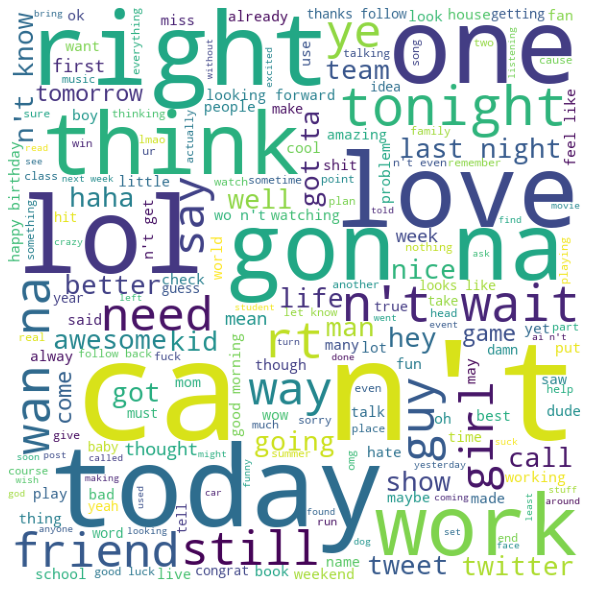

In [34]:
wordcloud = WordCloud(width = 600,
                      height = 600,
                      background_color ='white'
                    ).generate(words) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [23]:
words_ = words.split()
counts = Counter(words_)

AttributeError: 'list' object has no attribute 'split'

In [23]:
def word_counter(cleaned_words):
    word_counter = {}
    for word in cleaned_words:
        if word in word_counter:
            word_counter[word] += 1
        else:
            word_counter[word] = 1
    return word_counter

In [24]:
word_counter = word_counter(words_)

In [26]:
word_counter_sorted = sorted(word_counter.items(), key=lambda x:x[1],reverse=True)

In [32]:
word_dict = dict(word_counter_sorted[3:13])

<BarContainer object of 10 artists>

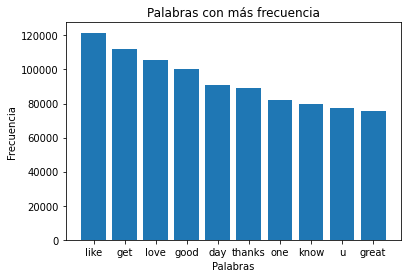

In [36]:
keys = word_dict.keys()
values = word_dict.values()
plt.title("Palabras con más frecuencia")
plt.xlabel("Palabras")
plt.ylabel("Frecuencia")
plt.bar(keys, values)


### Discusión de frecuencias


Se puede observar en el histograma que las palabras con más frecuencia son 'like' y 'get'. Podemos inferir que la palabra 'like' hace referencia a tweets donde los usuarios solicitan un 'me gusta' a su propio tweet. De igual forma, como las palabras estan en ingles puede hacer referencia a objetos o actividades o frases que los usuarios indican que les gusta. Por otro lado, la palabra 'get' puede ser utilizada en distintos contextos dependiendo de las cuentas o del usuario que coloco dicho tweet. Al realizar una breve investigación de los tweets que contenian 'get' en ellos, se puede observarque las cuentas de deportes como Basketball, Futball, etc, utilizan esta palabra muy amenudo haciendo referencia a marcadores o jugadas que los jugadores del equipo obtuvieron o desean obtener. De igual forma al hacer 'social marketing' se utiliza la palabra 'get' para decir que se necesitan obtener cierta cantidad de likes, retweets y/o followers. Por último, los contextos distintos donde los usuarios utilizan dicha palabra para decir que obtuvieron algo en su vida personal o laboral. En cuanto a la letra 'u', es interesante ver como los usuarios de twitter utilizan esta abreviación para referirse a la palabra 'you'. Esto puede ser debido a la longitud de cada tweet los usuarios prefieren utilizan abreviaciones para que en ellos puedan poner más texto o bien el ingles informal es más utilizado en redes sociales. 

Llama la atención que para la nube de palabras como para el histograma la palabra 'love' tuvo una alta frecuencia, esto puede ser debido que la mayoría de usuarios les gusta comentar sobre cosas que les gusta hacer, comer, ver y/o jugar. Podemos observar el mismo patron con las palabras thanks, good y day. En la nube se observan que más abreviaturas tienen más frecuencia tales como 'gonna' 'gotta' 'wanna'. Entre las palabras interesantes de discutir se encuentra 'lol', el cual es un acronimo para 'lots of laughs', el cual indica que en la mayoría de tweets en donde se utiliza esto, son aquellos que hacen referencia a algo gracioso.

## Generación y predicción de n-gramas

In [3]:
def extract_ngrams(data, num):
    n_grams = ngrams(nltk.word_tokenize(data), num)
    return [' '.join(grams) for grams in n_grams]

In [4]:
gram_2 = []
dataset = dataset_l[:10000]
gram_3 = []

In [5]:
for item in dataset:
    gram_2.append(extract_ngrams(item, 2))

In [6]:
for item in dataset:
    gram_3.append(extract_ngrams(item, 3))

In [10]:
flat_list_gram3 = []
flat_list_gram2 = []
def flatList(data):
    flat_list = []
    for sublist in data:
        for item in sublist:
            flat_list.append(item)
    return flat_list

In [11]:
flat_list_gram2 = flatList(gram_2)

In [12]:
flat_list_gram3 = flatList(gram_3)

In [15]:
freq_gram2 = (Counter(flat_list_gram2))
freq_gram3 = (Counter(flat_list_gram3))

In [20]:
sorted_freq_gram2 = freq_gram2.most_common()
sorted_freq_gram3 = freq_gram3.most_common()